<a href="https://colab.research.google.com/github/SayanBapariAI/Pytorch-Tutorial/blob/main/CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratice

In [37]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [38]:
url = 'https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv'
data = pd.read_csv(url)

In [39]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [40]:
classes = ['Iris-setosa','	Iris-versicolor','Iris-virginica']
data['target'] = data['target'].replace('Iris-setosa',0.0)
data['target'] = data['target'].replace('Iris-versicolor',1.0)
data['target'] = data['target'].replace('Iris-virginica',2.0)

In [41]:
data['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [42]:
X = data.drop('target', axis = 1)
y = data['target']
X.shape, y.shape

((150, 4), (150,))

In [43]:
import numpy as np
X = np.array(X.values)
y = np.array(y.values)

In [44]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
X.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [45]:
model = nn.Sequential(
    nn.Linear(4, 20),
    nn.ReLU(),
    nn.Linear(20, 20),
    nn.ReLU(),
    nn.Linear(20, 4)
)

In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr = 0.01)

In [47]:
torch.manual_seed(42)
X_train, X_test, y_train, y_test= tts(X, y, test_size = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([108, 4]),
 torch.Size([108]),
 torch.Size([42, 4]),
 torch.Size([42]))

In [48]:
torch.manual_seed(42)
epochs = 100

loss_list = []

for epoch in range(epochs):
  model.train()
  logits = model(X_train).squeeze()
  pred = torch.softmax(logits,dim = 1).argmax(dim = 1)
  loss = loss_fn(logits,y_train )
  loss_list.append(loss.detach().numpy())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

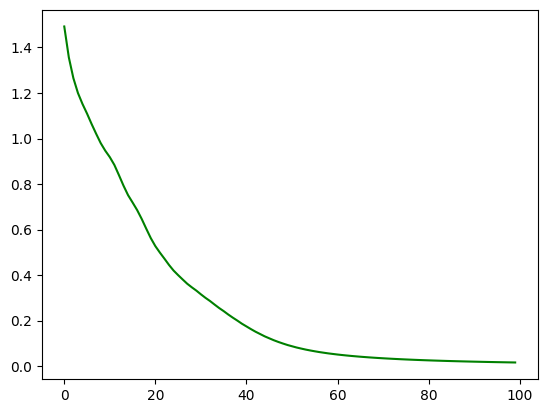

In [49]:
plt.plot(range(epochs),loss_list, c = 'g')

In [50]:
model.eval()

with torch.no_grad():
  y_logits = model(X).squeeze()
  y_loss = loss_fn(y_logits, y)
  y_pred = torch.sigmoid(y_logits).argmax(dim=1)
y_pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [51]:
y_loss

tensor(0.0731)

In [52]:
y_pred == y

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [53]:
data['predict'] = y_pred

In [54]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,0
2,4.7,3.2,1.3,0.2,0.0,0
3,4.6,3.1,1.5,0.2,0.0,0
4,5.0,3.6,1.4,0.2,0.0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,2
146,6.3,2.5,5.0,1.9,2.0,2
147,6.5,3.0,5.2,2.0,2.0,2
148,6.2,3.4,5.4,2.3,2.0,2


In [55]:
data['target'] = data['target'].replace(0.0,'Iris-setosa')
data['target'] = data['target'].replace(1.0,'Iris-versicolor')
data['target'] = data['target'].replace(2.0,'Iris-virginica')


In [56]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [57]:
data['predict'] = data['predict'].replace(0,'Iris-setosa')
data['predict'] = data['predict'].replace(1,'Iris-versicolor')
data['predict'] = data['predict'].replace(2,'Iris-virginica')

In [58]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


## save Model

In [59]:
torch.save(model.state_dict(),'iris_model.pt')

In [60]:
new_model = model.load_state_dict(torch.load('iris_model.pt'))

In [61]:
model.eval()

Sequential(
  (0): Linear(in_features=4, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=4, bias=True)
)

# CNN with pytorch

In [62]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt

In [63]:
transform = transforms.ToTensor()

In [64]:
train_data = datasets.MNIST(root='data', train = True, transform=transform, download=True)

test_data = datasets.MNIST(root='data', train = False, transform=transform, download=True)

In [65]:
train_data.data.shape, test_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [66]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [67]:
train_data.train_data

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [68]:
train_data.train_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

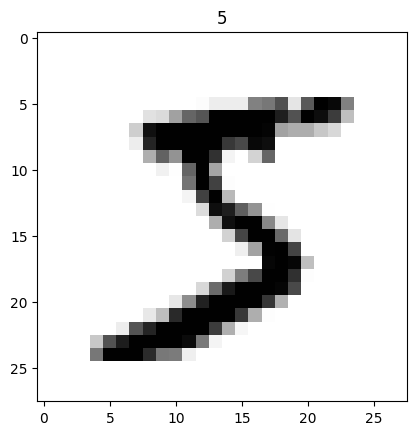

In [69]:
plt.imshow(train_data.train_data[0], cmap='binary')
plt.title(int(train_data.train_labels[0]))
plt.show()

In [242]:
train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)

In [212]:
X_train, y_train = next(iter(train_loader))

In [213]:
X_train.shape, y_train.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [139]:
X_train[0].shape, y_train[0], X_train.shape

(torch.Size([1, 28, 28]), tensor(9), torch.Size([32, 1, 28, 28]))

In [187]:
conv = nn.Conv2d(1,10, 4,1,1)
img = conv(X_train[0])
img.shape

torch.Size([10, 27, 27])

In [188]:
img_numpy = img.detach().numpy()

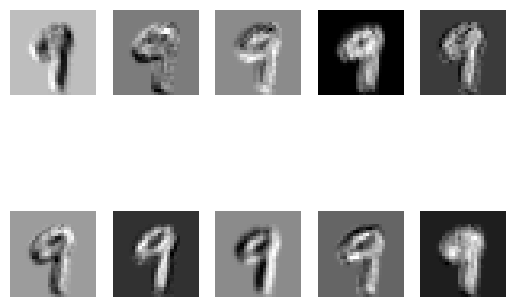

In [189]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(img_numpy[i], cmap = 'binary')
  plt.axis(False)
plt.show()

In [190]:
maxpool = nn.MaxPool2d(kernel_size = 2)
img1 = maxpool(img)
img1.shape

torch.Size([10, 13, 13])

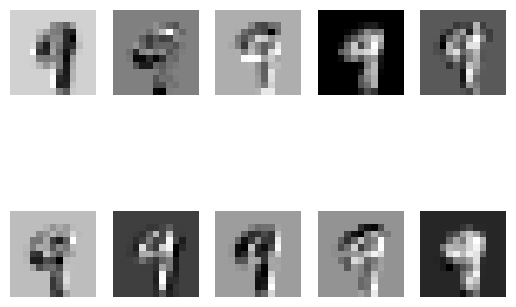

In [191]:
img_numpy2 = img1.detach().numpy()
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(img_numpy2[i], cmap = 'binary')
  plt.axis(False)
plt.show()

In [194]:
flatten_fn = nn.Flatten()
img3 = flatten_fn(img1)
img3.shape

torch.Size([10, 169])

In [207]:
no_cnn = 2
kernel_conv = 4
kernel_maxpool = 2
padd = 1
def fin_out_shape(no_cnn, kernel_conv, kernel_maxpool, padd):
  out_shape = torch.tensor(X_train[0].squeeze().shape)
  for i in range(no_cnn):
    a = (((out_shape + padd*2 ) - (kernel_conv-1))//kernel_maxpool)
    output_shape = a[0]*a[1]
    out_shape = a
    return output_shape


In [272]:
class Model(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape, kernel_conv, kernel_maxpool, padd):
    super().__init__()
    self.cnn1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, kernel_size=kernel_conv, stride=1, padding = padd),
        nn.MaxPool2d(kernel_size = kernel_maxpool),
    )
    self.cnn2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=kernel_conv, stride=1, padding = padd),
        nn.MaxPool2d(kernel_size = kernel_maxpool),
    )
    # output_shape = fin_out_shape(no_cnn = 2,kernel_conv=kernel_conv, kernel_maxpool=kernel_maxpool, padd = 1)

    self.output = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7, output_shape)
    )

  def forward(self, X:torch.Tensor):
    return self.output(self.cnn2(self.cnn1(X)))


In [282]:
model = Model(input_shape=1,
              hidden_units=10,
              output_shape=10,
              kernel_conv=3,
              kernel_maxpool=2,
              padd = 1).to('cpu')
model

Model(
  (cnn1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [283]:
loss_fn = nn.CrossEntropyLoss()
optitmizer = torch.optim.Adam(params = model.parameters(), lr = 0.1)

In [284]:
epochs = 5
for epoch in range(epochs):
  for batch, (X, y) in enumerate(train_loader):
    model.train()
    logits = model(X)
    loss = loss_fn(logits, y)
    optimizer.zero_grad()
    loss.backward()
    optitmizer.step()
    model.eval()
    # print(X.shape,y.shape)

In [305]:
model.eval()
with torch.no_grad():
  for batch, (X, y) in enumerate(test_loader):
    pred = model(X)


In [306]:
pred = pred.argmax(dim = 1)
pred

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 8, 6])

In [307]:
y

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [308]:
acc = pred == y
acc.detach().numpy()
acc = list(acc)

In [309]:
acc.count(True), acc.count(False)

(15, 1)

In [310]:
acc = acc.count(True)/len(acc) * 100
acc

93.75